In [1]:
import os
import re
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# from oneibl.onelight import ONE # only used for downloading data
# import wget
from utils import *
from plotting_utils import *
from analysis_utils import *
import dglm_hmm1
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


ibl_data_path = '../data_IBL'
colorsFeatures = [['#FAA61A','indigo','#99CC66','#59C3C3','#9593D9'],['#FAA61A',"#2369BD","#A9373B",'#99CC66','#59C3C3','#9593D9']]
colorsStates = ['darkblue','forestgreen','darkorange','purple']
myFeatures = [['bias','delta stimulus', 'previous choice', 'previous reward'],['bias','contrast left','contrast right', 'previous choice', 'previous reward']]
sns.set_context("talk")
colormap = ['rebeccapurple','teal','darkturquoise','springgreen']

In [6]:
ibl_data_path = '../data_IBL'
dfAll = pd.read_csv(ibl_data_path + '/Ibl_processed.csv')
subjectsWitten = np.unique(dfAll[dfAll['lab'] == 'wittenlab']['subject'])

df = pd.DataFrame(columns=['subject','K','fold']) # in total z=0,131
z = 0
for subject in subjectsWitten:
    for K in [1,2,3]:
        for fold in [0,1,2,3]:
            df.loc[z, 'subject'] = subject
            df.loc[z, 'K'] = K
            df.loc[z, 'fold'] = fold
            z += 1

# read from cluster array in order to get parallelizations
idx = 0
# idx = int(sys.argv[1])
subject = df.loc[idx,'subject']
K = df.loc[idx,'K']
fold = df.loc[idx,'fold']

# setting hyperparameters
sigmaList =  [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10]
L2penaltyW = 1
priorDirP = None
maxiter = 300
splitFolds = 4

initParam = 'all' # initializing for best GLM-HMM fit from all animals or subject-specific one

D = 4 # number of features
stimCol = [1]
sessStop = -1 # last session to use in fitting

In [7]:
testLl = np.load(f'../data_IBL/data_IBL_Cluster/{subject}/testLl_{subject}_D={D}_{K}_state_fold-{fold}_sigmas2D_L2penaltyW={L2penaltyW}_priorDirP={priorDirP}_untilSession{sessStop}_init-{initParam}.npy')

In [9]:
print(testLl.shape)

(17, 17)


<AxesSubplot:>

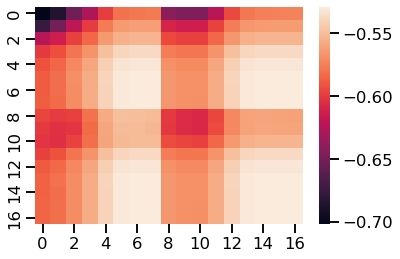

In [12]:
sns.heatmap(testLl[:,:])